In [1]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append(str(Path(".").resolve().parent.parent))

In [4]:
from berp.datasets import NaturalLanguageStimulus
from berp.languages.english import CMUPhonemizer

In [5]:
stimulus_path = "./old-man-and-the-sea/run1.pkl"

data_consonants = "../../workflow/heilbron2022/data/confusion_cutler2004/consonants.xls"
data_vowels = "../../workflow/heilbron2022/data/confusion_cutler2004/vowels.xls"

output_path = "confusion.npz"

## Load and preprocess experimental confusion data

In [6]:
# Map from "stimulus" column to IPA representation. Induced from tables 1 and 2 of Cutler et al 2004.
# NB they don't actually map the table ordering .. but we can figure this out
# Also double-checked (e.g. 14j) by listening to waveforms
ipa_mapping = {
    "01p": "p",
    "02b": "b",
    "03t": "t",
    "04d": "d",
    "05k": "k",
    "06g": "g",
    "07f": "f",
    "08v": "v",
    "09th": "θ",
    "10dth": "ð",
    "11s": "s",
    "12z": "z",
    "13sh": "ʃ",
    "14h": "h",
    "14j": "ʒ",
    "15ch": "tʃ",
    "16dj": "dʒ",
    "17m": "m",
    "18n": "n",
    "19ng": "ŋ",
    "19y": "j",
    "20l": "l",
    "21r": "ɹ",
    "22w": "w",
    
    "01i": "ɪ",
    "02ii": "i",
    "03ei": "eɪ",
    "04ai": "aɪ",
    "05oi": "ɔɪ",
    "06e": "ɛ",
    "07a": "æ",
    "08sr": "ɚ",
    "09u": "ʊ",
    "10uu": "u",
    "11au": "aʊ",
    "12ou": "oʊ",
    "13oo": "ɑ",
    "14uh": "ʌ",
    "15o": "ɔ",
    # NB no schwa!
    
    # Special annotations for missed consonant / vowel
    "23miss": "_",
    "16miss": "_",
}

### Consonants

In [7]:
consonant_df = pd.read_excel(data_consonants, sheet_name=1)
consonant_df["stimulus"] = consonant_df.stimulus.map(ipa_mapping)
consonant_df["answer"] = consonant_df.answer.map(ipa_mapping)

In [8]:
consonant_df

,subject,answer,syllable,stimulus,vowel/cons,init/final,signalnoise,language
0,w1,b,doi,d,c,cv,0,AE
1,w1,w,ru,ɹ,c,cv,0,AE
2,w1,w,bu,b,c,cv,0,AE
3,w1,θ,hi,h,c,cv,0,AE
4,w1,t,choi,tʃ,c,cv,0,AE
...,...,...,...,...,...,...,...,...
30955,z4,ʒ,iij,ʒ,c,vc,16,AE
30956,z4,d,aud,d,c,vc,16,AE
30957,z4,ð,oidth,ð,c,vc,16,AE
30958,z4,_,ul,l,c,vc,16,AE


In [9]:
consonant_pivot = consonant_df.pivot_table("signalnoise", "answer", "stimulus", aggfunc="count")
consonant_pivot

stimulus,b,d,dʒ,f,g,h,j,k,l,m,...,tʃ,v,w,z,ð,ŋ,ɹ,ʃ,ʒ,θ
answer,,,,,,,,,,,,,,,,,,,,,
_,46.0,15.0,2.0,27.0,23.0,21.0,6.0,17.0,19.0,8.0,...,2.0,29.0,7.0,13.0,16.0,6.0,9.0,3.0,3.0,31.0
b,712.0,44.0,5.0,35.0,44.0,36.0,8.0,7.0,13.0,19.0,...,1.0,135.0,19.0,7.0,77.0,1.0,16.0,NaN,NaN,31.0
d,40.0,928.0,26.0,7.0,35.0,2.0,13.0,3.0,12.0,6.0,...,NaN,22.0,NaN,29.0,116.0,7.0,3.0,NaN,6.0,9.0
dʒ,7.0,27.0,1142.0,2.0,13.0,2.0,7.0,1.0,1.0,2.0,...,32.0,6.0,NaN,17.0,27.0,NaN,3.0,4.0,132.0,NaN
f,57.0,15.0,1.0,831.0,19.0,42.0,NaN,8.0,42.0,9.0,...,4.0,94.0,NaN,NaN,19.0,2.0,7.0,NaN,1.0,355.0
g,129.0,35.0,57.0,6.0,947.0,4.0,9.0,15.0,9.0,10.0,...,1.0,42.0,2.0,10.0,31.0,53.0,10.0,1.0,4.0,5.0
h,85.0,14.0,3.0,44.0,38.0,428.0,8.0,117.0,2.0,8.0,...,1.0,35.0,6.0,2.0,6.0,NaN,17.0,NaN,NaN,37.0
j,23.0,18.0,2.0,5.0,73.0,1.0,620.0,1.0,5.0,2.0,...,1.0,5.0,22.0,2.0,3.0,NaN,NaN,NaN,NaN,1.0
k,14.0,1.0,1.0,30.0,16.0,23.0,NaN,1048.0,4.0,1.0,...,10.0,5.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,33.0


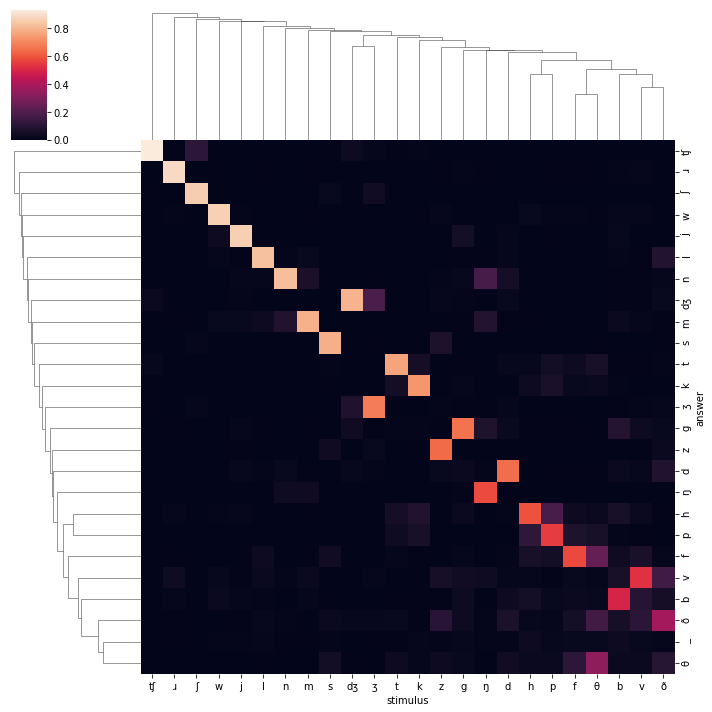

In [10]:
consonant_pivot_normed = consonant_pivot.fillna(0) / consonant_pivot.sum(axis=0)
sns.clustermap(consonant_pivot_normed)

### Vowels

In [11]:
vowel_df = pd.read_excel(data_vowels, sheet_name=1)
vowel_df["stimulus"] = vowel_df.stimulus.map(ipa_mapping)
vowel_df["answer"] = vowel_df.answer.map(ipa_mapping)

In [12]:
vowel_df

,subject,answer,syllable,stimulus,vowel/cons,init/final,signalnoise,language
0,w1,i,gii,i,v,cv,0,AE
1,w1,eɪ,wei,eɪ,v,cv,0,AE
2,w1,ɔɪ,hoi,ɔɪ,v,cv,0,AE
3,w1,æ,tha,æ,v,cv,0,AE
4,w1,ɔɪ,yoi,ɔɪ,v,cv,0,AE
...,...,...,...,...,...,...,...,...
30955,z4,aʊ,aush,aʊ,v,vc,16,AE
30956,z4,ɔ,ong,ɔ,v,vc,16,AE
30957,z4,ɛ,ez,ɛ,v,vc,16,AE
30958,z4,i,iik,i,v,vc,16,AE


In [37]:
vowel_pivot = vowel_df.pivot_table("signalnoise", "answer", "stimulus", aggfunc="count")
vowel_pivot

stimulus,aɪ,aʊ,eɪ,i,oʊ,u,æ,ɑ,ɔ,ɔɪ,ɚ,ɛ,ɪ,ʊ,ʌ
answer,,,,,,,,,,,,,,,
_,9.0,28.0,13.0,16.0,19.0,39.0,26.0,38.0,56.0,6.0,4.0,29.0,24.0,61.0,30.0
aɪ,1857.0,NaN,6.0,11.0,2.0,7.0,3.0,4.0,8.0,3.0,2.0,5.0,9.0,9.0,8.0
aʊ,1.0,1738.0,1.0,1.0,50.0,44.0,35.0,28.0,19.0,41.0,NaN,2.0,1.0,30.0,33.0
eɪ,21.0,1.0,1795.0,3.0,NaN,3.0,86.0,8.0,30.0,2.0,NaN,65.0,17.0,6.0,19.0
i,2.0,2.0,52.0,1832.0,1.0,27.0,3.0,1.0,NaN,1.0,8.0,14.0,29.0,1.0,1.0
oʊ,1.0,81.0,1.0,NaN,1790.0,19.0,1.0,28.0,12.0,21.0,NaN,NaN,1.0,26.0,14.0
u,NaN,8.0,1.0,12.0,52.0,1574.0,1.0,2.0,NaN,6.0,NaN,NaN,7.0,91.0,2.0
æ,1.0,13.0,69.0,NaN,NaN,NaN,1705.0,56.0,214.0,NaN,NaN,148.0,4.0,1.0,96.0
ɑ,2.0,82.0,2.0,2.0,8.0,11.0,19.0,1199.0,564.0,10.0,1.0,14.0,3.0,29.0,208.0


### Insert schwa

This confusion data doesn't include schwa /ə/. Pretend that /ə/ has confusion patterns related to phonetically close elements.

In [50]:
assert "ə" not in vowel_pivot.index
assert "ə" not in vowel_pivot.columns

source_phonemes = ["ʌ", "ɚ", "ʊ"]

In [51]:
vowel_pivot_adjusted = vowel_pivot.copy()

In [52]:
# Add row

source_rows = vowel_pivot.loc[source_phonemes][:]
for phon in source_phonemes:
    source_rows.loc[phon, phon] = np.nan
vowel_pivot_adjusted.loc["ə"] = source_rows.median(axis=0)

In [53]:
# Add column
source_cols = vowel_pivot[source_phonemes][:]
for phon in source_phonemes:
    source_cols.loc[phon, phon] = np.nan
vowel_pivot_adjusted["ə"] = source_cols.median(axis=1)

In [54]:
# Add diagonal
vowel_pivot_adjusted.loc["ə", "ə"] = np.median([vowel_pivot.loc[phon, phon] for phon in source_phonemes])

In [55]:
vowel_pivot_adjusted

stimulus,aɪ,aʊ,eɪ,i,oʊ,u,æ,ɑ,ɔ,ɔɪ,ɚ,ɛ,ɪ,ʊ,ʌ,ə
answer,,,,,,,,,,,,,,,,
_,9.0,28.0,13.0,16.0,19.0,39.0,26.0,38.0,56.0,6.0,4.0,29.0,24.0,61.0,30.0,30.0
aɪ,1857.0,NaN,6.0,11.0,2.0,7.0,3.0,4.0,8.0,3.0,2.0,5.0,9.0,9.0,8.0,8.0
aʊ,1.0,1738.0,1.0,1.0,50.0,44.0,35.0,28.0,19.0,41.0,NaN,2.0,1.0,30.0,33.0,31.5
eɪ,21.0,1.0,1795.0,3.0,NaN,3.0,86.0,8.0,30.0,2.0,NaN,65.0,17.0,6.0,19.0,12.5
i,2.0,2.0,52.0,1832.0,1.0,27.0,3.0,1.0,NaN,1.0,8.0,14.0,29.0,1.0,1.0,1.0
oʊ,1.0,81.0,1.0,NaN,1790.0,19.0,1.0,28.0,12.0,21.0,NaN,NaN,1.0,26.0,14.0,20.0
u,NaN,8.0,1.0,12.0,52.0,1574.0,1.0,2.0,NaN,6.0,NaN,NaN,7.0,91.0,2.0,46.5
æ,1.0,13.0,69.0,NaN,NaN,NaN,1705.0,56.0,214.0,NaN,NaN,148.0,4.0,1.0,96.0,48.5
ɑ,2.0,82.0,2.0,2.0,8.0,11.0,19.0,1199.0,564.0,10.0,1.0,14.0,3.0,29.0,208.0,29.0


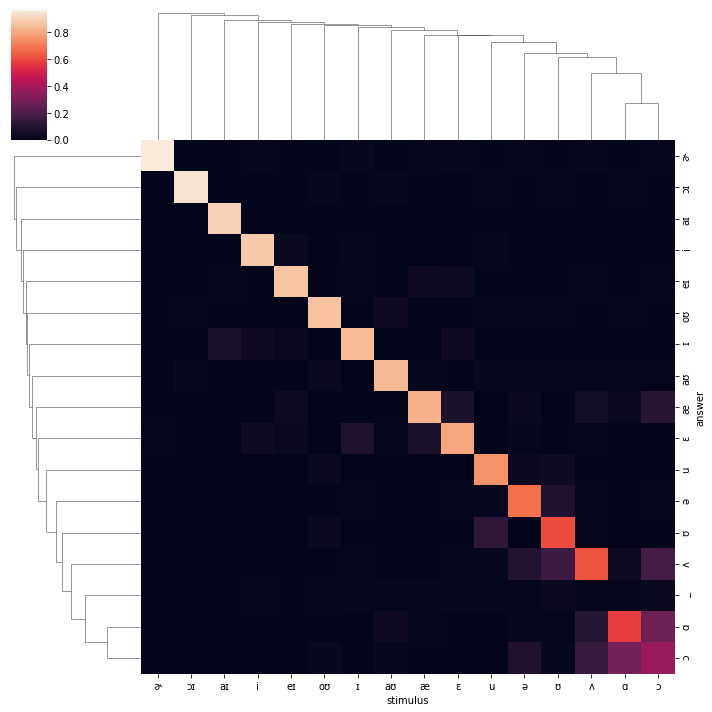

In [56]:
vowel_pivot_normed = vowel_pivot_adjusted.fillna(0) / vowel_pivot_adjusted.sum(axis=0)
sns.clustermap(vowel_pivot_normed)

## Check mapping with stimulus data

In [61]:
with open(stimulus_path, "rb") as f:
    stim = pickle.load(f)

In [62]:
stim.phonemes

['t',
 'm',
 'θ',
 'ʃ',
 'aʊ',
 'ð',
 'z',
 'v',
 'ɪ',
 'ʊ',
 'dʒ',
 'b',
 'n',
 'tʃ',
 'ə',
 'aɪ',
 'h',
 'r',
 'ɑ',
 'l',
 'k',
 'f',
 'ɔ',
 'ər',
 'ŋ',
 'ʒ',
 'ɚ',
 'ɛ',
 'd',
 'ɔɪ',
 'j',
 's',
 'æ',
 'i',
 'oʊ',
 'w',
 'g',
 'ʌ',
 'p',
 'eɪ',
 'u',
 '_']

In [63]:
confusion_phonemes = set(consonant_pivot.index) | set(vowel_pivot.index)

In [64]:
set(stim.phonemes) - confusion_phonemes

{'r', 'ə', 'ər'}

In [65]:
confusion_phonemes - set(stim.phonemes)

{'ɹ'}

In [66]:
# TODO unify

In [11]:
# Dummy confusion matrix for now.
gamma = 0.01
confusion = np.eye(len(stim.phonemes))
confusion += gamma
confusion /= confusion.sum(axis=0)
confusion

array([[0.71126761, 0.00704225, 0.00704225, ..., 0.00704225, 0.00704225,
        0.00704225],
       [0.00704225, 0.71126761, 0.00704225, ..., 0.00704225, 0.00704225,
        0.00704225],
       [0.00704225, 0.00704225, 0.71126761, ..., 0.00704225, 0.00704225,
        0.00704225],
       ...,
       [0.00704225, 0.00704225, 0.00704225, ..., 0.71126761, 0.00704225,
        0.00704225],
       [0.00704225, 0.00704225, 0.00704225, ..., 0.00704225, 0.71126761,
        0.00704225],
       [0.00704225, 0.00704225, 0.00704225, ..., 0.00704225, 0.00704225,
        0.71126761]])

In [12]:
np.savez(output_path, confusion=confusion, phonemes=stim.phonemes)